# **CSCI 4967: Final Project**

**Spring 2024**

*Group Members: Weijun Li, Yuanzhe Liu, Haochen Song, Yuming Xie, Yi Xu*

# 0.&nbsp;Using GPU for Accelerating Process

In [ ]:
# test if GPU is running
import tensorflow as tf
tf.test.gpu_device_name()
# check which GPU is running
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9206089282419991684
 xla_global_id: -1]

# 1.&nbsp;Import the Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 2.&nbsp;Download, Load, Clean and Slice the dataset

## 2.1&nbsp;Dataset

The dataset is collected, cklustered, and cleaned by *Haochen Song*.

## 2.2&nbsp;Summary of Data

In [ ]:
#df = pd.read_csv('/content/cleaned_data900.csv')
df = pd.read_csv('/content/Cleaned_Data_7k.csv')

In [ ]:
#Check the number of rows and columns
rows, columns = df.shape
print('# of rows: {0} and # of columns: {1}'.format(rows,columns))

# of rows: 9197 and # of columns: 30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9197 entries, 0 to 9196
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   INSTNM           9197 non-null   object 
 1   PREDDEG          9197 non-null   int64  
 2   SATVR25          9197 non-null   float64
 3   SATVR75          9197 non-null   float64
 4   SATMT25          9197 non-null   float64
 5   SATMT75          9197 non-null   float64
 6   ACTCM25          9197 non-null   float64
 7   ACTCM75          9197 non-null   float64
 8   MD_EARN_WNE_P10  9197 non-null   float64
 9   STUFACR          9197 non-null   float64
 10  UGDS_WHITE       9197 non-null   float64
 11  UGDS_BLACK       9197 non-null   float64
 12  UGDS_HISP        9197 non-null   float64
 13  UGDS_ASIAN       9197 non-null   float64
 14  UGDS_AIAN        9197 non-null   float64
 15  UGDS_ASIAN.1     9197 non-null   float64
 16  UGDS_2MOR        9197 non-null   float64
 17  UGDS_NRA      

In [ ]:
# check the missing values
print('# missing values across all columns:\n',df.isnull().sum())

# missing values across all columns:
 INSTNM             0
PREDDEG            0
SATVR25            0
SATVR75            0
SATMT25            0
SATMT75            0
ACTCM25            0
ACTCM75            0
MD_EARN_WNE_P10    0
STUFACR            0
UGDS_WHITE         0
UGDS_BLACK         0
UGDS_HISP          0
UGDS_ASIAN         0
UGDS_AIAN          0
UGDS_ASIAN.1       0
UGDS_2MOR          0
UGDS_NRA           0
UGDS_UNKN          0
IRPS_WHITE         0
IRPS_BLACK         0
IRPS_HISP          0
IRPS_ASIAN         0
IRPS_AIAN          0
IRPS_NHPI          0
IRPS_2MOR          0
IRPS_NRA           0
IRPS_UNKN          0
PCTPELL            0
OPEFLAG            0
dtype: int64


# 3.&nbsp;Exploratory Data Analysis

Display summary statistics

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PREDDEG,9197.0,2.975209,0.166961,1.0,3.000000,3.000000,3.000000,4.0000
SATVR25,9197.0,498.843971,73.574037,210.0,450.000000,490.000000,540.000000,750.0000
SATVR75,9197.0,601.567903,68.530390,260.0,560.000000,600.000000,640.000000,800.0000
SATMT25,9197.0,498.089377,76.445309,200.0,450.000000,490.000000,530.000000,790.0000
SATMT75,9197.0,601.954442,75.035978,325.0,550.000000,590.000000,640.000000,800.0000
ACTCM25,9197.0,20.690225,4.003376,2.0,18.000000,20.000000,22.000000,35.0000
ACTCM75,9197.0,26.040992,3.761651,9.0,23.000000,26.000000,28.000000,36.0000
MD_EARN_WNE_P10,9197.0,50340.176833,8743.950386,21400.0,50340.176833,50340.176833,50340.176833,132969.0000
STUFACR,9197.0,13.963897,4.295597,3.0,11.000000,13.000000,17.000000,78.0000
UGDS_WHITE,9197.0,0.586324,0.213800,0.0,0.477300,0.632700,0.748500,1.0000


Generating a correlations heatmap

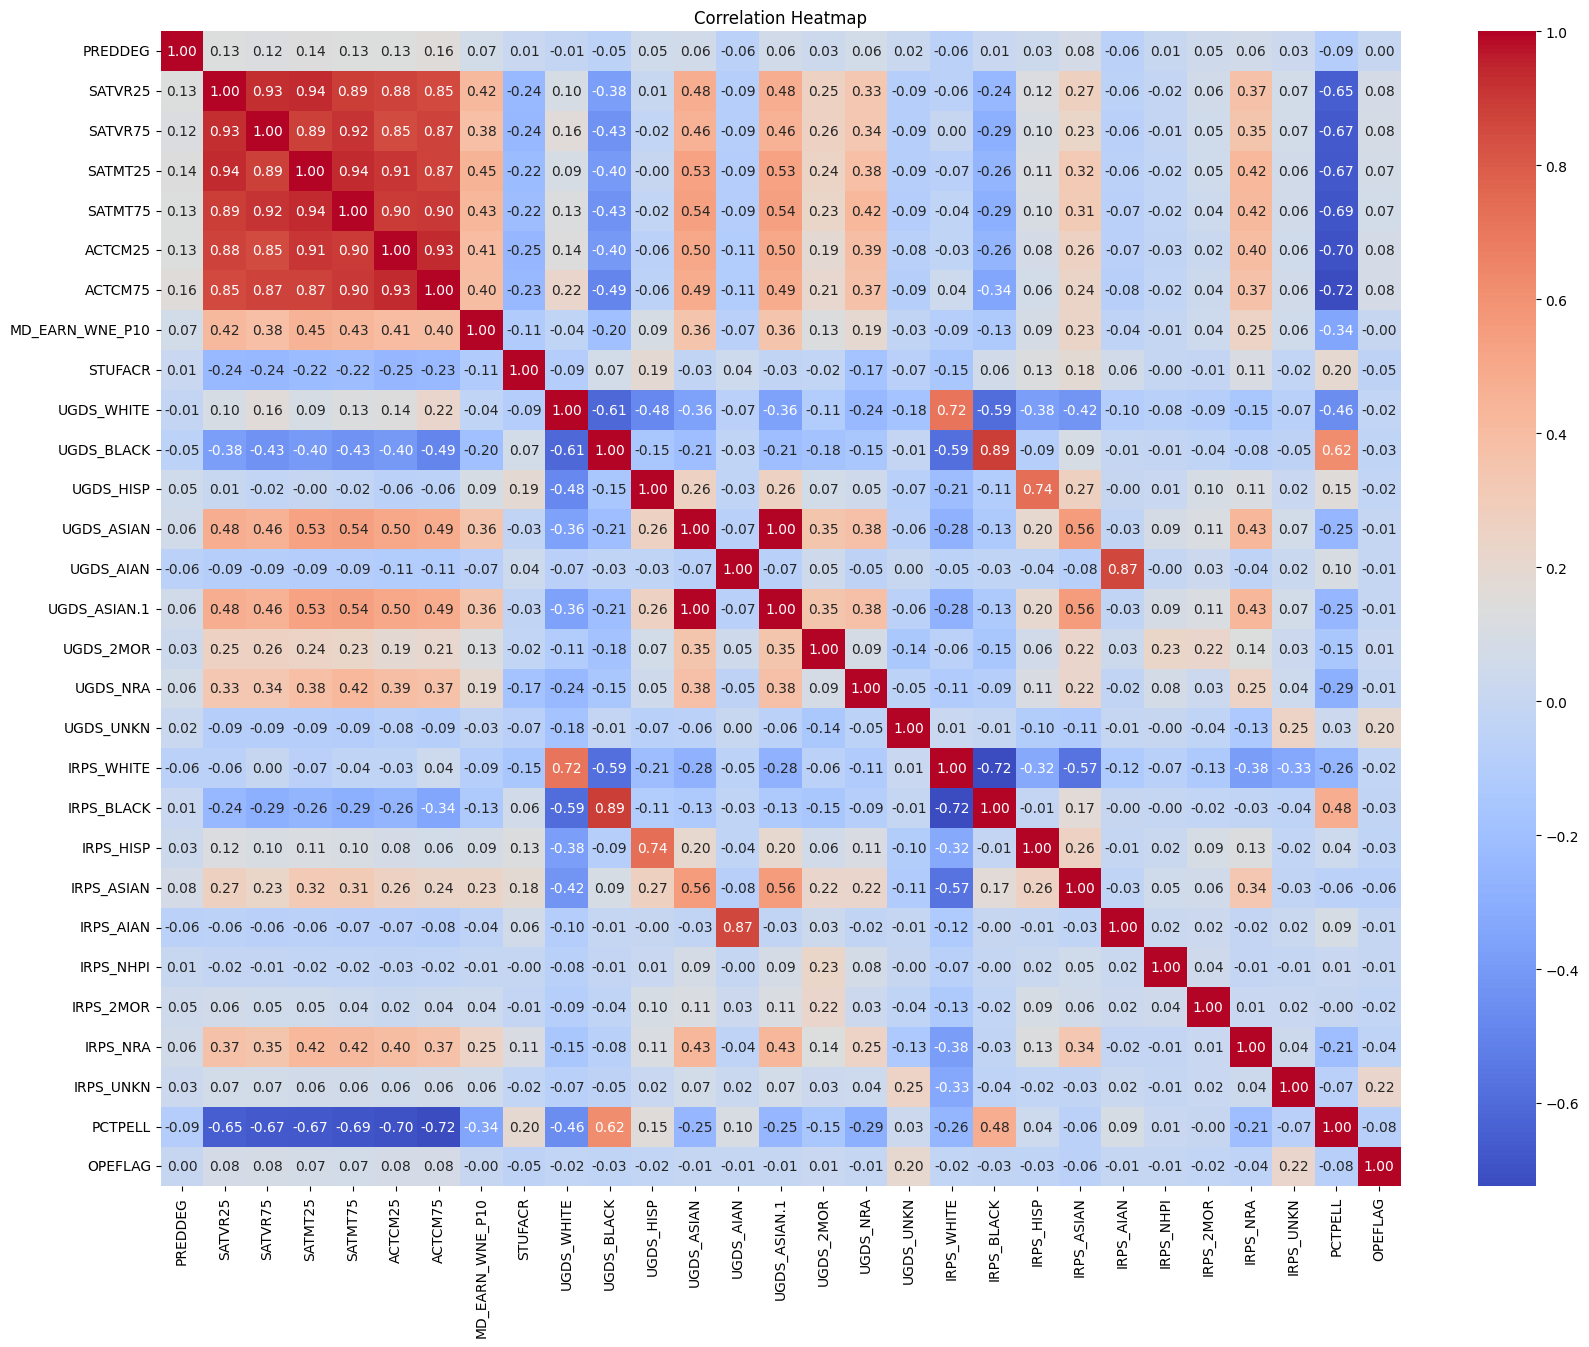

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

PCA

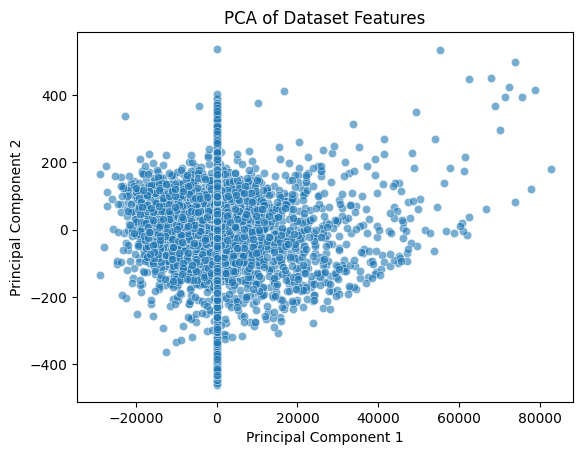

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title('PCA of Dataset Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Scatter plot for SAT vs. the target variable

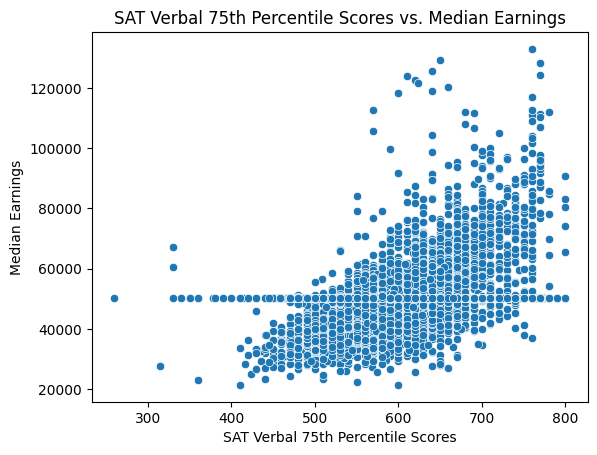

In [ ]:
# Scatter plot for SAT vs. the target variable
sns.scatterplot(x='SATVR75', y='MD_EARN_WNE_P10', data=df)
plt.title('SAT Verbal 75th Percentile Scores vs. Median Earnings')
plt.xlabel('SAT Verbal 75th Percentile Scores')
plt.ylabel('Median Earnings')
plt.show()

Distribution of Target Variable

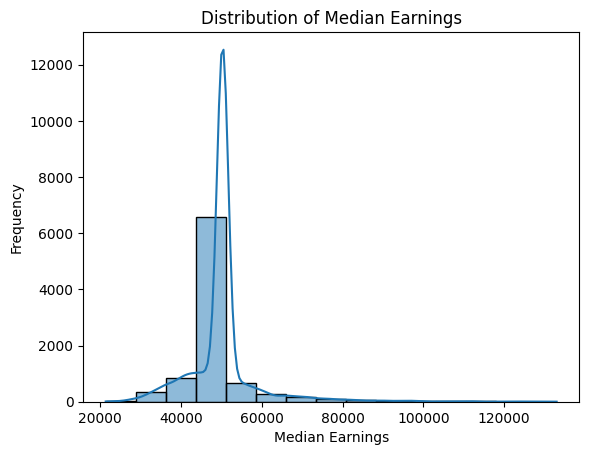

In [ ]:
# Histogram of the Target Variable
sns.histplot(df['MD_EARN_WNE_P10'], kde=True)
plt.title('Distribution of Median Earnings')
plt.xlabel('Median Earnings')
plt.ylabel('Frequency')
plt.show()

Box Plots for Categorical Variables

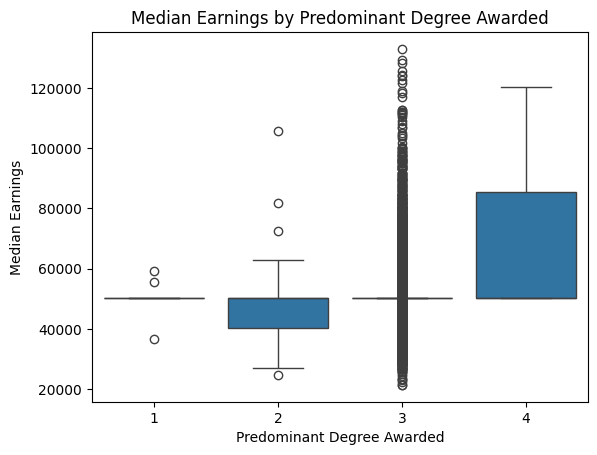

In [ ]:
sns.boxplot(x='PREDDEG', y='MD_EARN_WNE_P10', data=df)
plt.title('Median Earnings by Predominant Degree Awarded')
plt.xlabel('Predominant Degree Awarded')
plt.ylabel('Median Earnings')
plt.show()

Pairwise Relationships of Standard Tests with Median Earning

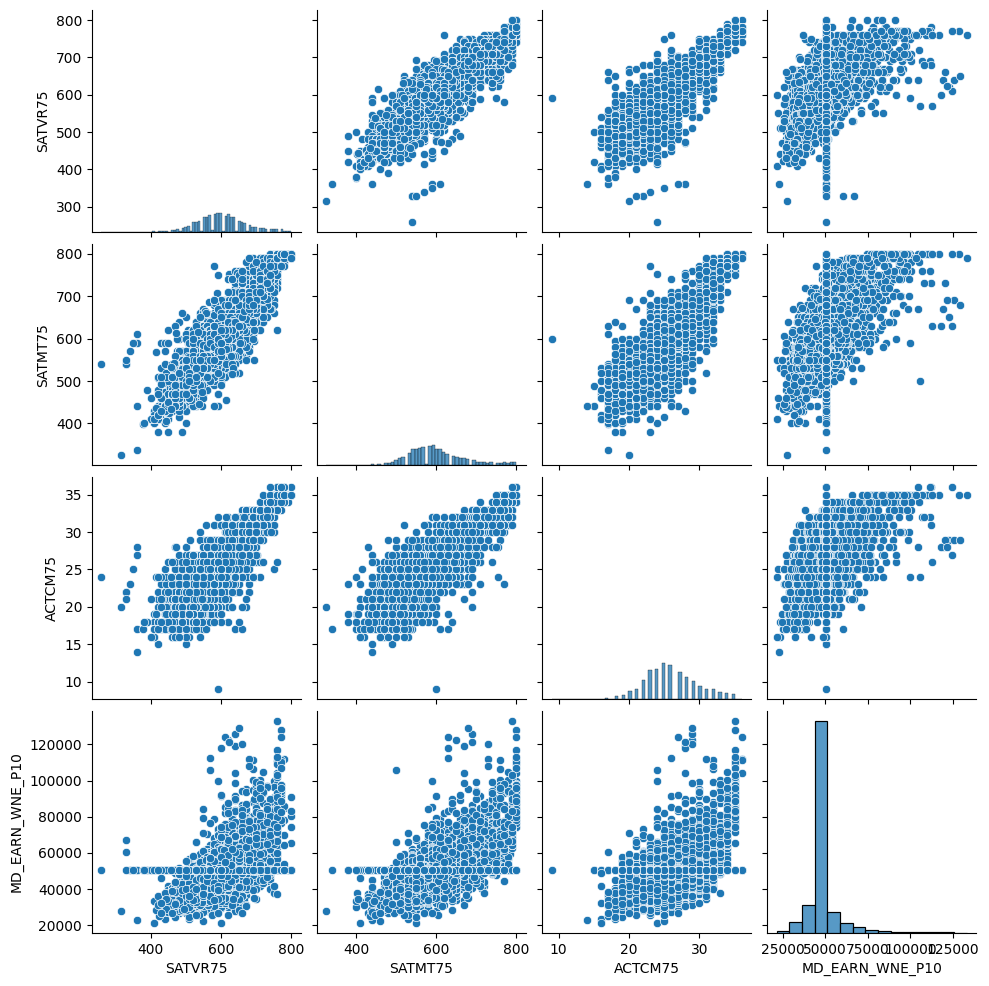

In [ ]:
# Select a subset of features for readability
features = ['SATVR75', 'SATMT75', 'ACTCM75', 'MD_EARN_WNE_P10']
sns.pairplot(df[features])
plt.show()

Outlier Detection

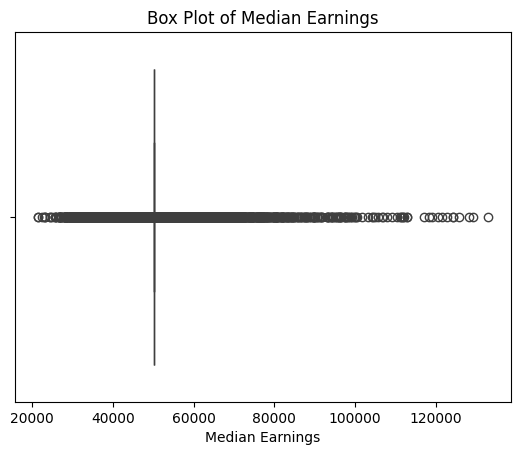

In [ ]:
sns.boxplot(x=df['MD_EARN_WNE_P10'])
plt.title('Box Plot of Median Earnings')
plt.xlabel('Median Earnings')
plt.show()

# 4.&nbsp;The Models

In [ ]:
X = df.drop(['INSTNM', 'MD_EARN_WNE_P10'], axis=1)
le = LabelEncoder()
y = le.fit_transform(df['INSTNM'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
linear_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1, max_iter=10000)

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [ ]:
y_pred_linear = linear_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
#print("Linear Regression Accuracy:", accuracy_score(y_test, y_pred_linear))
#print(confusion_matrix(y_test, y_pred_linear))
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Linear Mean Squared Error:", mse_linear)
print("Linear R-squared:", r2_linear)
print("Lasso Mean Squared Error:", mse_lasso)
print("Lasso R-squared:", r2_lasso)
print("Ridge Mean Squared Error:", mse_ridge)
print("Ridge R-squared:", r2_ridge)

Linear Mean Squared Error: 175042.66182995326
Linear R-squared: 0.048512343307753114
Lasso Mean Squared Error: 174723.56146760422
Lasso R-squared: 0.050246892204844795
Ridge Mean Squared Error: 174868.41313331356
Ridge R-squared: 0.04945951517039571


## 4.1&nbsp; Regression Models

In [ ]:
#df = df.drop(columns=['INSTNM'])

X = df.drop('MD_EARN_WNE_P10', axis=1)  # Predictor variables
y = df['MD_EARN_WNE_P10']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000),
}

# Dictionary to store results
results = {}

### 4.1.1&nbsp;Linear Regression

In [ ]:
model1 = models['Linear Regression']
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = model1.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
results['Linear Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Linear Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Linear Regression: 
MSE: 63243036.555815764 and R^2: 0.24006939326081078


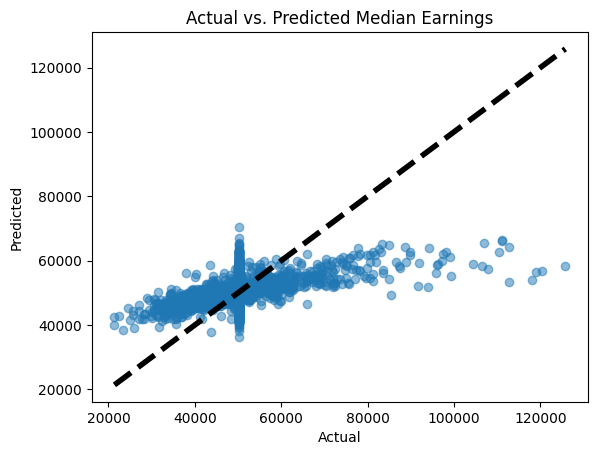

In [ ]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Median Earnings')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.show()

### 4.1.2&nbsp;Ridge Regression

In [ ]:
model2 = models['Ridge Regression']
model2.fit(X_train, y_train)

Ridge()

In [ ]:
y_pred_ridge = model2.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
results['Ridge Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Ridge Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Ridge Regression: 
MSE: 63248236.814018205 and R^2: 0.24000690677081615


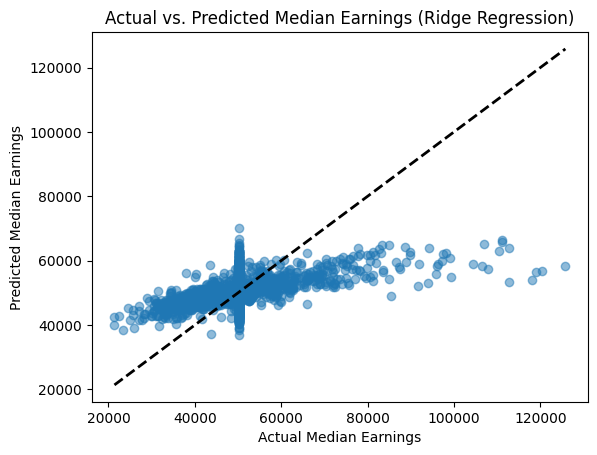

In [ ]:
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Median Earnings')
plt.ylabel('Predicted Median Earnings')
plt.title('Actual vs. Predicted Median Earnings (Ridge Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

### 4.1.3&nbsp;Lasso Regression

In [ ]:
model3 = models['Lasso Regression']
model3.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [ ]:
y_pred_lasso = model3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
results['Lasso Regression'] = {'MSE': mse, 'R^2': r2}
print(f"{'Lasso Regression'}: \n{'MSE'}: {mse} and {'R^2'}: {r2}")

Lasso Regression: 
MSE: 63262060.792716414 and R^2: 0.23984079734451724


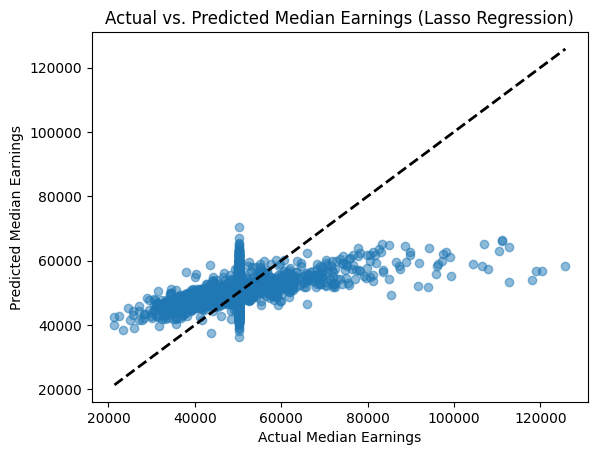

In [ ]:
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel('Actual Median Earnings')
plt.ylabel('Predicted Median Earnings')
plt.title('Actual vs. Predicted Median Earnings (Lasso Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 5.&nbsp;Evaluation of Performances

# 6.&nbsp;Disscussions & Conclusion

# 7.&nbsp;References